In [9]:
from dataloader_classes import Lung_Train_Dataset, Lung_Test_Dataset, Lung_Val_Dataset, dataset_bar
from small_functions import *
from threeclasses_classifier import *
from binaryclassifier import train_binary_classifier_model1, train_binary_classifier_model2

# Torch
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms

import time
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
''' Uncomment this part of code if you make changes in the imported modules >>>>'''
# # reload modules so that the changes take effect without restarting the jupyter notebook kernel
# import importlib
# import sys
# importlib.reload(sys.modules['dataloader_classes'])
# importlib.reload(sys.modules['small_functions'])
# importlib.reload(sys.modules['threeclasses_classifier'])
# importlib.reload(sys.modules['binaryclassifier'])
''' <<< Uncomment this part of code if you make changes in the imported modules'''


In [31]:
ld_train = Lung_Train_Dataset()
ld_train.describe()
# print(len(ld_train))
# im, class_oh = ld_train[5215]
# print(im.shape)
# print(im)
# print(class_oh)

This is the training dataset of the Lung Dataset used for the Small Project in the 50.039 Deep Learning class in Feb-March 2021. 
It contains a total of 5216 images, of size 150 by 150.
The images are stored in the following locations and each one contains the following number of images:
 - train_normal, in folder ./dataset/train/normal/: 1341 images.
 - train_infected(non_covid), in folder ./dataset/train/infected/non-covid/: 2530 images.
 - train_infected(covid), in folder ./dataset/train/infected/covid/: 1345 images.



In [32]:
ld_test = Lung_Test_Dataset()
ld_test.describe()
# print(len(ld_test))
# im, class_oh = ld_test[476]
# print(im.shape)
# print(im)
# print(class_oh)

This is the test dataset of the Lung Dataset used for the Small Project in the 50.039 Deep Learning class in Feb-March 2021. 
It contains a total of 615 images, of size 150 by 150.
The images are stored in the following locations and each one contains the following number of images:
 - test_normal, in folder ./dataset/test/normal/: 234 images.
 - test_infected(non_covid), in folder ./dataset/test/infected/non-covid/: 242 images.
 - test_infected(covid), in folder ./dataset/test/infected/covid/: 139 images.



In [33]:
ld_val = Lung_Val_Dataset()
ld_val.describe()
# print(len(ld_val))
# im, class_oh = ld_val[15]
# print(im.shape)
# print(im)
# print(class_oh)

This is the validation dataset of the Lung Dataset used for the Small Project in the 50.039 Deep Learning class in Feb-March 2021. 
It contains a total of 25 images, of size 150 by 150.
The images are stored in the following locations and each one contains the following number of images:
 - val_normal, in folder ./dataset/val/normal/: 8 images.
 - val_infected(non_covid), in folder ./dataset/val/infected/non-covid: 8 images.
 - val_infected(covid), in folder ./dataset/val/infected/covid: 9 images.



In [5]:
bs_val = 64

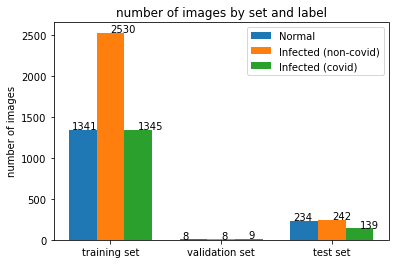

In [6]:
# data visualization
dataset_bar(ld_train,ld_val,ld_test)

In [7]:
# creating dataloader object
gen = torch.Generator()
train_loader = DataLoader(ld_train, batch_size = bs_val, shuffle = True, generator=gen)
print(train_loader)
test_loader = DataLoader(ld_test, batch_size = bs_val, shuffle = True, generator=gen)
print(test_loader)
val_loader = DataLoader(ld_val, batch_size = bs_val, shuffle = True, generator=gen)
print(val_loader)

## Train 3-classes clasifier

In [10]:
# Define loss function for training 
loss_function=nn.NLLLoss()
# Initialise model 
model=Classifier()
# Train model
model=train_model(model,train_loader,test_loader,2,loss_function)

Epoch: 1/2 @ 2021-03-21 17:42:30.100742  
 Training Loss: 9.214 -  Training Accuracy: 0.364 -  Validation Loss: 7.383 -  Validation Accuracy: 0.392
Epoch: 1/2 @ 2021-03-21 17:43:00.004265  
 Training Loss: 2.766 -  Training Accuracy: 0.405 -  Validation Loss: 2.355 -  Validation Accuracy: 0.260
Epoch: 1/2 @ 2021-03-21 17:43:25.998267  
 Training Loss: 1.585 -  Training Accuracy: 0.498 -  Validation Loss: 1.191 -  Validation Accuracy: 0.405
Epoch: 1/2 @ 2021-03-21 17:43:53.693873  
 Training Loss: 1.226 -  Training Accuracy: 0.506 -  Validation Loss: 1.043 -  Validation Accuracy: 0.408
Epoch: 1/2 @ 2021-03-21 17:44:19.470880  
 Training Loss: 0.923 -  Training Accuracy: 0.589 -  Validation Loss: 0.727 -  Validation Accuracy: 0.734
Epoch: 1/2 @ 2021-03-21 17:44:45.532886  
 Training Loss: 0.872 -  Training Accuracy: 0.572 -  Validation Loss: 0.628 -  Validation Accuracy: 0.814
Epoch: 1/2 @ 2021-03-21 17:45:12.470881  
 Training Loss: 0.799 -  Training Accuracy: 0.608 -  Validation Loss: 

In [11]:
# Save trained model to model folder
model_idx=0000  # set your model name
model_name='three_classes'+str(model_idx)
path='./model/'+model_name+'.pt'
save_model(model,path)


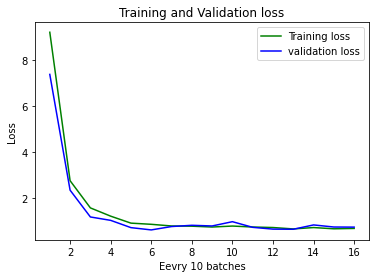

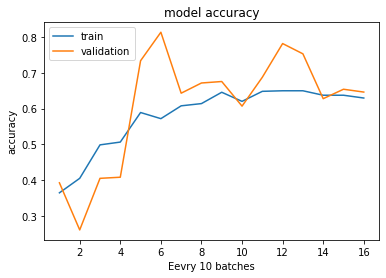

In [12]:
# Plot learning curve and save to folder learningCurve
loss_fig,acc_fig=learning_curve(model.history)
loss_fig.savefig('./learningCurve/loss'+str(model_idx)+'.jpg')
acc_fig.savefig('./learningCurve/acc'+str(model_idx)+'.jpg')

## Load the trained model

our final model for 3-classes classifiers is three_classes2.1.pt, which is saved in model folder

In [13]:
# Load model
model_idx=2.1
loaded_model=load_model('./model/three_classes'+str(model_idx)+'.pt')
loaded_model

Classifier(
  (conv1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=165888, out_features=3, bias=True)
  (drop): Dropout(p=0.5, inplace=False)
  (fl): LogSoftmax(dim=1)
)

In [14]:
predicted_label,targeted_labels=predict(loaded_model,val_loader)
calculate_accuracy(predicted_label[0],targeted_labels[0])

tensor(0.7200)

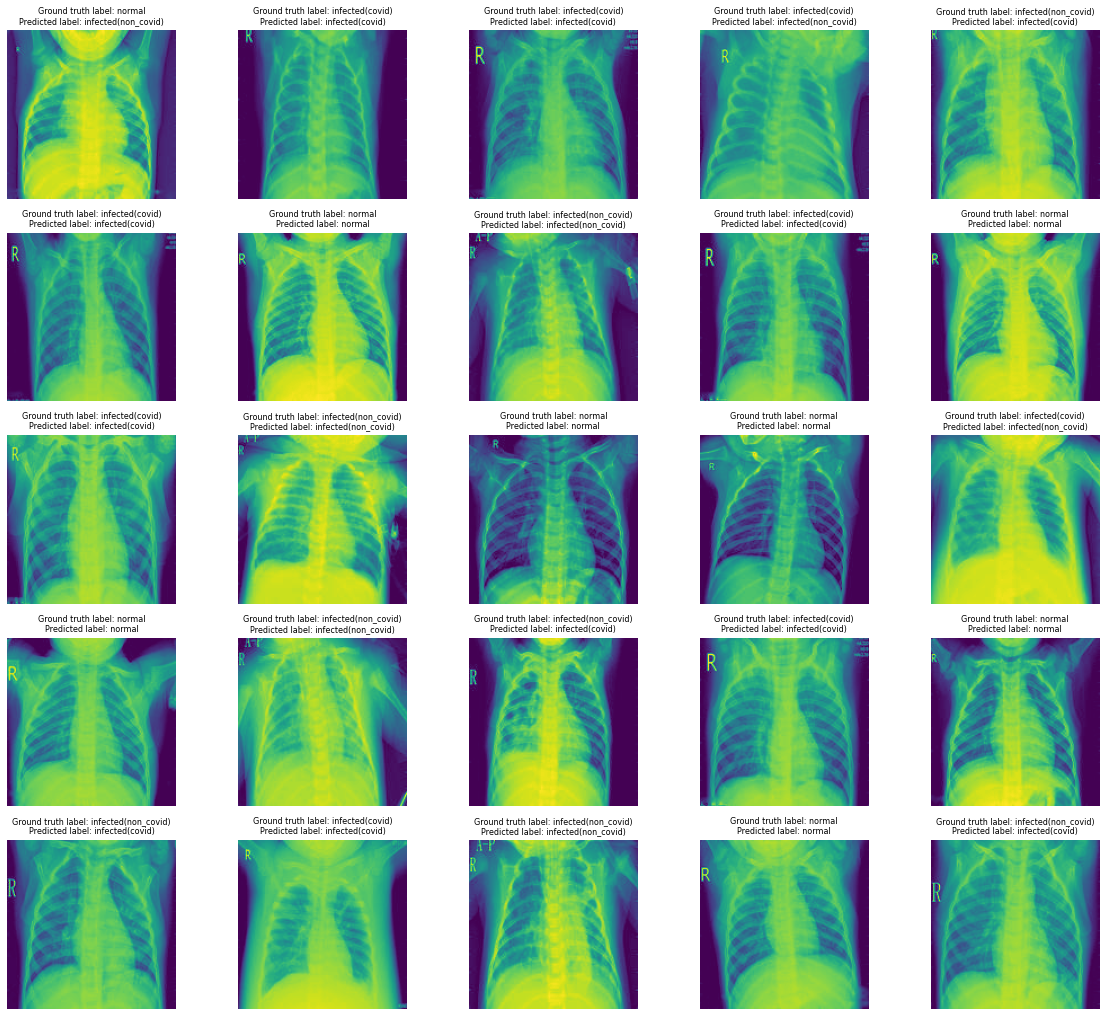

In [15]:
show_val_images(loaded_model,val_loader)

In [16]:
val_conf_df=calculate_confusion_df(loaded_model,val_loader)
# Recall = TP / (TP+FN)
val_conf_matrix=val_conf_df.to_numpy()
val_conf_df
# conf_matrix
# recall=conf_matrix[0,0]+[]

Predicted Normal  Predicted Infected (non_covid)  \
Actual Normal                               7                               1   
Actual Infected (non_covid)                 0                               4   
Actual Infected (covid)                     0                               2   

                             Predicted Infected (covid)  
Actual Normal                                         0  
Actual Infected (non_covid)                           4  
Actual Infected (covid)                               7

In [17]:
val_covid2others=np.sum(val_conf_matrix[2,:-1])/np.sum(val_conf_matrix[2,:])
val_covid2others
# print(conf_matrix[2,:-1])

0.2222222222222222

In [18]:
test_conf_df=calculate_confusion_df(loaded_model,test_loader)
# Recall = TP / (TP+FN)
test_conf_matrix=test_conf_df.to_numpy()
test_conf_df
# conf_matrix
# recall=conf_matrix[0,0]+[]

Predicted Normal  Predicted Infected (non_covid)  \
Actual Normal                             115                              82   
Actual Infected (non_covid)                 4                             236   
Actual Infected (covid)                     2                              57   

                             Predicted Infected (covid)  
Actual Normal                                        37  
Actual Infected (non_covid)                           2  
Actual Infected (covid)                              80

In [19]:
test_covid2others=np.sum(test_conf_matrix[2,:-1])/np.sum(test_conf_matrix[2,:])
test_covid2others

0.4244604316546763

## Train 2 Binary classifier

In [20]:
# binary classifier architectire
loss_function=nn.NLLLoss()
model1, predlist = train_binary_classifier_model1(train_loader,1,loss_function,gen,test_loader)
model2 = train_binary_classifier_model2(train_loader,1,loss_function,predlist,gen,test_loader)


checking if data is shuffled but same tensor([[[0.1725, 0.1686, 0.1490,  ..., 0.1373, 0.1804, 0.2314],
         [0.1255, 0.1373, 0.1373,  ..., 0.1255, 0.1686, 0.2157],
         [0.1216, 0.0980, 0.0941,  ..., 0.1098, 0.1294, 0.1529],
         ...,
         [0.1020, 0.1059, 0.1098,  ..., 0.1098, 0.1098, 0.1098],
         [0.1020, 0.1059, 0.1098,  ..., 0.1098, 0.1098, 0.1098],
         [0.1098, 0.1059, 0.1059,  ..., 0.1098, 0.1098, 0.1098]]]) tensor([0., 1., 0.]) 
Epoch: 1/1 @ 2021-03-21 17:49:27.946218  
 Training Loss: 1.702 -  Training Accuracy: 0.586 -  Validation Loss: 1.163 -  Validation Accuracy: 0.617
Epoch: 1/1 @ 2021-03-21 17:49:40.104750  
 Training Loss: 0.668 -  Training Accuracy: 0.613 -  Validation Loss: 0.415 -  Validation Accuracy: 0.837
Epoch: 1/1 @ 2021-03-21 17:49:54.719807  
 Training Loss: 0.380 -  Training Accuracy: 0.744 -  Validation Loss: 0.370 -  Validation Accuracy: 0.821
Epoch: 1/1 @ 2021-03-21 17:50:08.888322  
 Training Loss: 0.344 -  Training Accuracy: 0.78

In [21]:
# Save trained model to model folder
model_idx=0000 # set your model name  
model1_name='first_binary_classes'+str(model_idx)
model2_name='second_binary_classes'+str(model_idx)
path1='./model/'+model1_name+'.pt'
path2='./model/'+model2_name+'.pt'
save_model(model1,path1)
save_model(model2,path2)

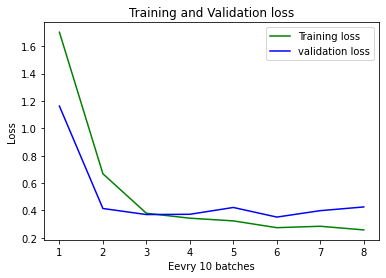

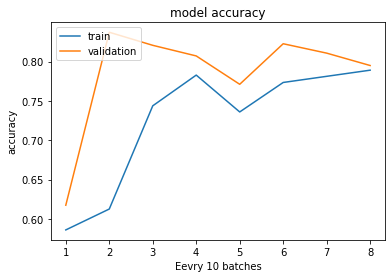

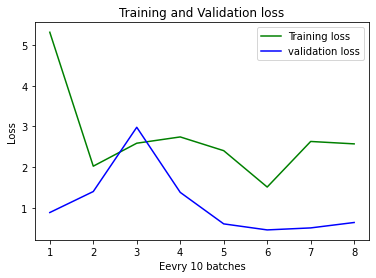

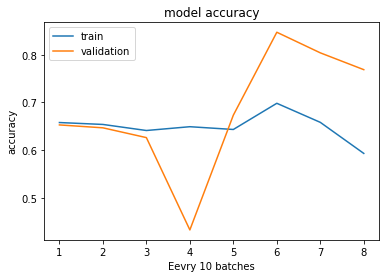

In [22]:
# Plot learning curve and save to folder learningCurve
binary1_loss_fig,binary1_acc_fig=learning_curve(model1.history)
binary1_loss_fig.savefig('./learningCurve/binary1_loss'+str(model_idx)+'.jpg')
binary1_acc_fig.savefig('./learningCurve/binary1_acc'+str(model_idx)+'.jpg')

binary2_loss_fig,binary2_acc_fig=learning_curve(model2.history)
binary2_loss_fig.savefig('./learningCurve/binary2_loss'+str(model_idx)+'.jpg')
binary2_acc_fig.savefig('./learningCurve/binary2_acc'+str(model_idx)+'.jpg')


## Load the trained model
our final model for binary classifiers are first_binary_classes1.pt and second_binary_classes2.pt, which are saved in model folder

In [23]:
# Load model
model_idx=1
loaded_model1=load_model('./model/first_binary_classes'+str(model_idx)+'.pt')
print(loaded_model1)
# Load model
loaded_model2=load_model('./model/second_binary_classes'+str(model_idx)+'.pt')
print(loaded_model2)

Classifier(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=82944, out_features=2, bias=True)
  (drop): Dropout(p=0.5, inplace=False)
  (fl): LogSoftmax(dim=1)
)
Classifier2(
  (conv1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (blk1): Block(
    (layer1): Sequential(
      (0): Conv2d(32, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (layer2): Sequential(
      (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (dropout): Dropout

In [24]:
# for 1st binary classifier
predicted_label1,targeted_labels1=predict(loaded_model1,val_loader,firstclassifier=True)
calculate_accuracy(predicted_label1[0],targeted_labels1[0])

tensor(0.9600)

In [25]:
# for 2nd binary classifier
predicted_label2,targeted_labels2=predict(loaded_model2,val_loader,secondclassifier=True)
calculate_accuracy(predicted_label2[0],targeted_labels2[0])

tensor(0.6471)

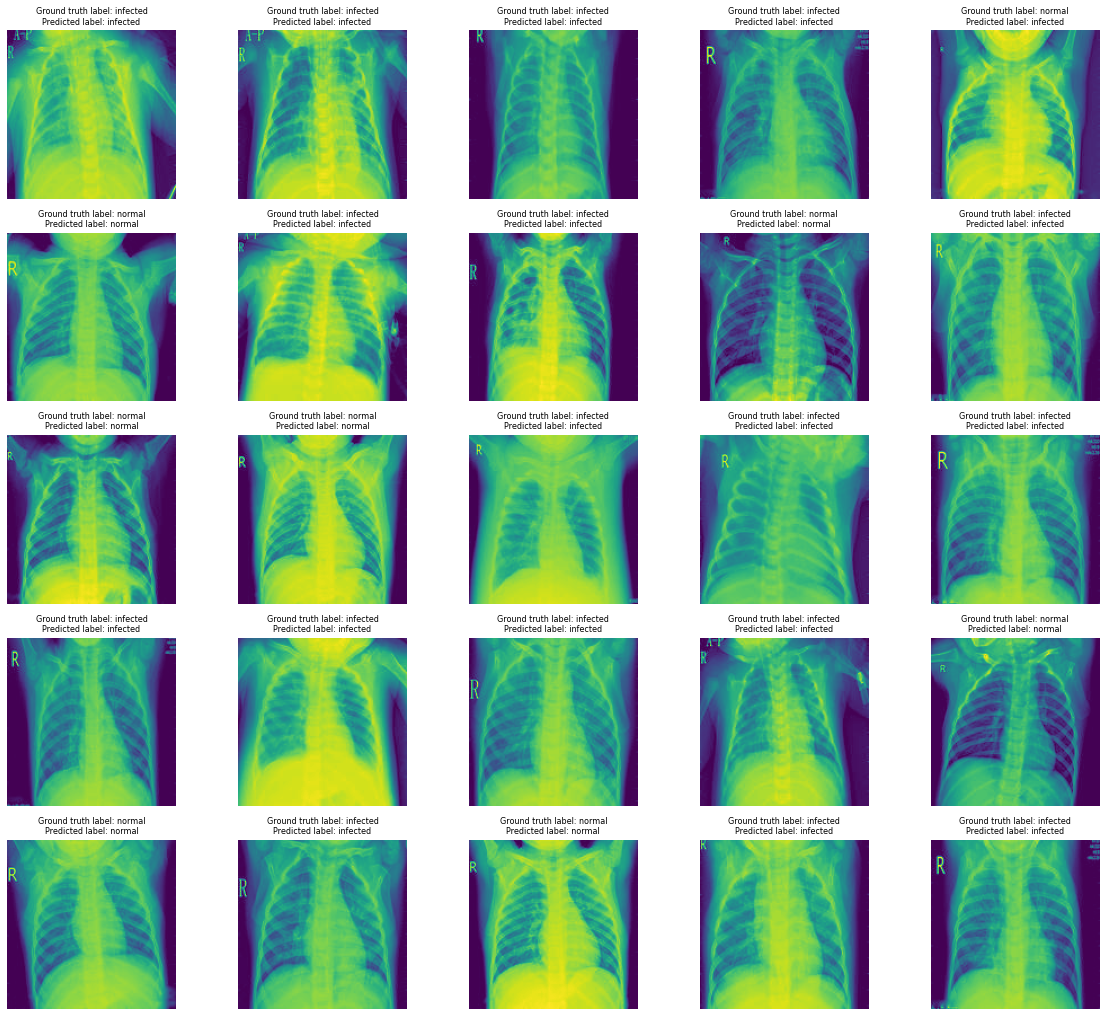

In [30]:
show_val_images(loaded_model1,val_loader,firstclassifier=True)

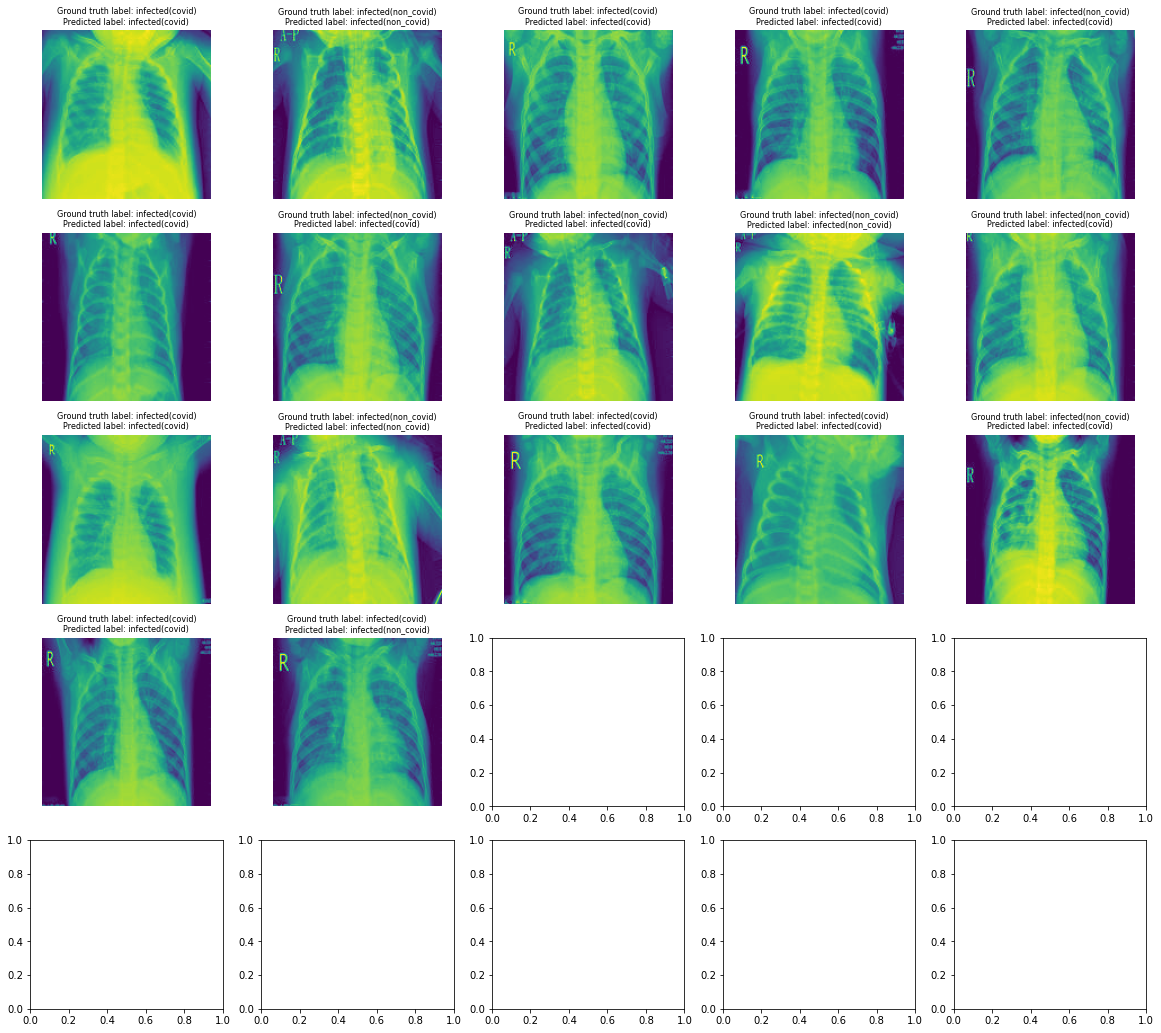

In [27]:
show_val_images(loaded_model2,val_loader,secondclassifier=True)

In [28]:
val_conf_df=calculate_confusion_df(loaded_model1,val_loader,firstclassifier=True)
# Recall = TP / (TP+FN)
val_conf_matrix=val_conf_df.to_numpy()
val_conf_df
# conf_matrix
# recall=conf_matrix[0,0]+[]

Predicted Normal  Predicted Infected
Actual Normal                   7                   1
Actual Infected                 0                  17

In [29]:
val_conf_df=calculate_confusion_df(loaded_model2,val_loader,secondclassifier=True)
# Recall = TP / (TP+FN)
val_conf_matrix=val_conf_df.to_numpy()
val_conf_df
# conf_matrix
# recall=conf_matrix[0,0]+[]

Predicted Infected (non_covid)  \
Actual Infected (non_covid)                               3   
Actual Infected (covid)                                   1   

                             Predicted Infected (covid)  
Actual Infected (non_covid)                           5  
Actual Infected (covid)                               8